In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 32})
plt.rcParams["figure.figsize"] = (12,8)
import torch
import numpy as np
import scipy.signal
import scipy.io
import pandas as pd
import itertools
from itertools import product
import os
from tqdm.notebook import tqdm, trange

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error as MSE, log_loss,r2_score
import seaborn as sns
import xgboost as xgb

## DATASET

In [5]:
storage_patrh = os.path.join(os.getcwd(),'feature_storage')
listfiles = os.listdir(storage_patrh)
list_featurestorage = [fname for fname in listfiles if fname.endswith(('csv','json')) ]
list_featurestorage

['102.csv',
 '103.csv',
 'columns.csv',
 'EWT_features_test.json',
 'EWT_features_test_aftx.json',
 'EWT_features_test_x.json',
 'EWT_features_train.json',
 'EWT_features_train_aftx.json',
 'EWT_features_train_x.json',
 'kernels (1).json',
 'kernels.json',
 'minirocket2000_Best_test.csv',
 'minirocket2000_Best_train.csv',
 'minirocket2000_test.csv',
 'minirocket2000_train.csv',
 'minirocket2500_test.csv',
 'minirocket2500_train.csv',
 'minirocket3000_test.csv',
 'minirocket3000_train.csv',
 'tsfel_test.csv',
 'tsfel_train.csv']

In [6]:
train_features_path = os.path.join(storage_patrh, 'minirocket2000_Best_test.csv')
test_features_path  = os.path.join(storage_patrh, 'minirocket2000_Best_train.csv')

In [7]:
df_train = pd.read_csv(train_features_path)
df_test  = pd.read_csv(test_features_path )

In [8]:
df_test

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931
0,0,0.3773,0.7649,0.1459,0.3793,0.7615,0.1488,0.3868,0.7640,0.1463,...,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.0,1.0,0.000
1,1,0.3767,0.7653,0.1449,0.3737,0.7650,0.1489,0.3763,0.7704,0.1475,...,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.0,1.0,0.000
2,2,0.3805,0.7667,0.1450,0.3734,0.7681,0.1470,0.3804,0.7701,0.1462,...,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.0,1.0,0.000
3,3,0.3819,0.7658,0.1459,0.3802,0.7632,0.1492,0.3817,0.7657,0.1502,...,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.0,1.0,0.000
4,4,0.3803,0.7681,0.1468,0.3791,0.7644,0.1483,0.3854,0.7662,0.1474,...,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.0,1.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,0.4136,0.7279,0.1511,0.4258,0.6923,0.1806,0.4385,0.6710,0.2070,...,0.750,1.0,1.000,0.875,1.0,0.250,0.625,1.0,0.0,0.875
49996,49996,0.4104,0.7259,0.1524,0.4345,0.6913,0.1826,0.4368,0.6664,0.2127,...,0.125,1.0,0.875,0.250,1.0,0.375,0.125,1.0,0.0,0.750
49997,49997,0.4147,0.7247,0.1516,0.4293,0.6955,0.1783,0.4373,0.6705,0.2040,...,0.875,1.0,0.875,0.375,1.0,1.000,0.875,1.0,0.0,0.625
49998,49998,0.4156,0.7265,0.1496,0.4312,0.6965,0.1761,0.4345,0.6748,0.1998,...,0.875,1.0,0.875,0.125,1.0,0.750,1.000,1.0,0.0,1.000


In [9]:
X_train = df_train.astype('float32').values
y_train = np.arange(40).repeat(1250)

X_test = df_test.astype('float32').values
y_test = np.arange(40).repeat(1250) 

In [10]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

## MODELS

In [ ]:
xgBoost = xgb.XGBClassifier(random_state=42)
knn     = KNeighborsClassifier(n_neighbors=1)
svc     = SVC(probability=True,random_state=42)
randomForest  = RandomForestClassifier(random_state=42,n_estimators=100,max_depth=None)
randomForest2 = RandomForestClassifier(random_state=42)

adaBoost = AdaBoostClassifier(random_state=42)
lda = LinearDiscriminantAnalysis(tol  = 1e-2)
nb       = GaussianNB()

from sklearn.linear_model import RidgeClassifierCV, LogisticRegression, LogisticRegressionCV
lin = RidgeClassifierCV()
logreg = LogisticRegression()

models =  ((lda,"Linear Discriminant Analysis"),
#     (xgBoost,"XGBoost Classifier"),
           (knn,"KNN Classifier"),
#            (svc,"SVC Classifier"),
           (randomForest,"Random Forest Classifier"),
#            (randomForest2,"Random Forest Classifier 2"),
#            (adaBoost,"AdaBoost Classifier"),
#            (lin,"Linear Ridge Classifier CV"),
            (logregcv,"Logistic Regression"),
           (nb,"Naive Bayes Classifier"))

## FULL FEATURE SPACE

In [11]:
for model,name in models:
    print(name)
    model.fit(X_train,y_train)
    print(f"Accuracy for test: {name}:\t {model.score(X_test,y_test)},Accuracy for train: {model.score(X_train,y_train)}")

Linear Discriminant Analysis
Accuracy for test: Linear Discriminant Analysis:	 0.8441,Accuracy for train: 1.0
KNN Classifier
Accuracy for test: KNN Classifier:	 0.69262,Accuracy for train: 1.0
Random Forest Classifier
Accuracy for test: Random Forest Classifier:	 0.79006,Accuracy for train: 0.99964
Naive Bayes Classifier
Accuracy for test: Naive Bayes Classifier:	 0.68728,Accuracy for train: 0.98806


Accuracy of Linear Discriminant Analysis:	 0.8441


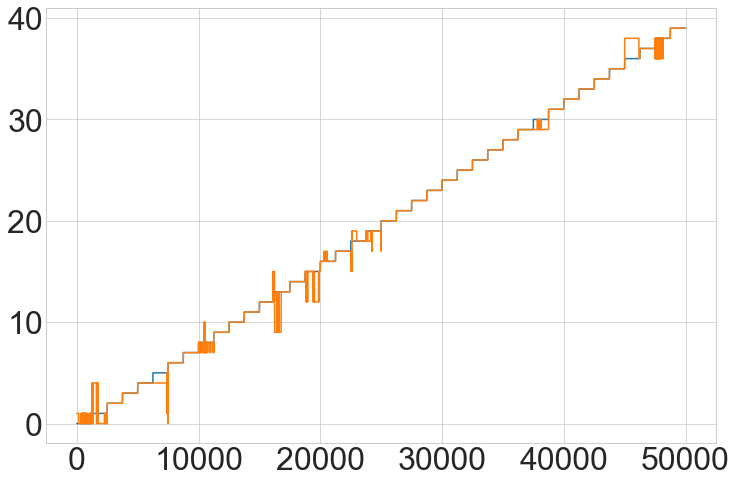

In [12]:
clf_id = 0
predicts = models[clf_id][0].predict(X_test)
plt.plot(y_test)
plt.plot(predicts)
print(f"Accuracy of {models[clf_id][1]}:\t {models[0][0].score(X_test,y_test)}")

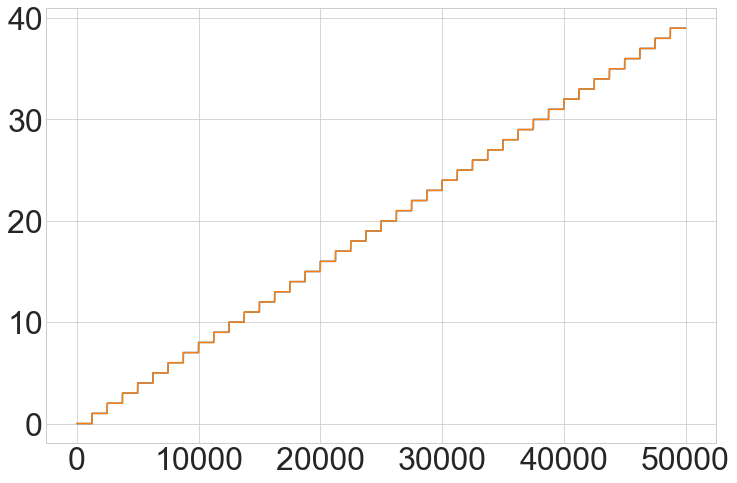

In [13]:
predicts = models[0][0].predict(X_train)
plt.plot(y_train)
plt.plot(predicts)

## CORRELATION

In [14]:
df_all = df_train.copy()
print(df_all.shape)

if 'source' in df_all.columns:
    df_all = df_all.drop(columns='source')

# Create correlation matrix
corr_matrix = df_all.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
df_train.drop(to_drop, axis=1, inplace=True)
df_test.drop(to_drop, axis=1, inplace=True)
print(df_train.shape, df_test.shape,)

(50000, 1933)


c:\users\ronkin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


(50000, 435) (50000, 435)


In [15]:
X_train_ = df_train.astype('float32').values
X_test_ = df_test.astype('float32').values
scaler = MinMaxScaler()
X_train_ = scaler.fit_transform(X_train_)
X_test_  = scaler.transform(X_test_)

In [16]:
from copy import deepcopy
models_ = deepcopy(models)

for model,name in models_:
    print(name)
    model.fit(X_train_,y_train)
    print(f"Accuracy for test: {name}:\t {model.score(X_test_,y_test)},Accuracy for train: {model.score(X_train_,y_train)}")

Linear Discriminant Analysis
Accuracy for test: Linear Discriminant Analysis:	 0.80348,Accuracy for train: 1.0
KNN Classifier
Accuracy for test: KNN Classifier:	 0.61456,Accuracy for train: 1.0
Random Forest Classifier
Accuracy for test: Random Forest Classifier:	 0.76988,Accuracy for train: 0.99794
Naive Bayes Classifier
Accuracy for test: Naive Bayes Classifier:	 0.70292,Accuracy for train: 0.98892


## CORRELATION + RF FEATURE IMPORTANCE FEATURE SELECTION

In [17]:
featuresrf = models_[2][0].feature_importances_
print(featuresrf.shape)

(435,)


In [29]:
featuresrf = models_[2][0].feature_importances_
print(featuresrf.shape)
idx4rest = np.where(featuresrf>0.2*featuresrf.max())#0.023=0.32
# print(df_train.columns[:-1][idx4rest])
X_train__ = X_train_[:,idx4rest[0]]
X_test__  = X_test_ [:,idx4rest[0]]
print(X_train__.shape)

(435,)
(50000, 18)


In [30]:
models__ = deepcopy(models)

for model,name in models__:
    print(name)
    model.fit(X_train__,y_train)
    print(f"Accuracy for test: {name}:\t {model.score(X_test__,y_test)},Accuracy for train: {model.score(X_train__,y_train)}")

Linear Discriminant Analysis
Accuracy for test: Linear Discriminant Analysis:	 0.94206,Accuracy for train: 0.99878
KNN Classifier
Accuracy for test: KNN Classifier:	 0.78046,Accuracy for train: 1.0
Random Forest Classifier
Accuracy for test: Random Forest Classifier:	 0.90756,Accuracy for train: 0.99998
Naive Bayes Classifier
Accuracy for test: Naive Bayes Classifier:	 0.85672,Accuracy for train: 0.99778


Accuracy of Random Forest Classifier:	 0.90756


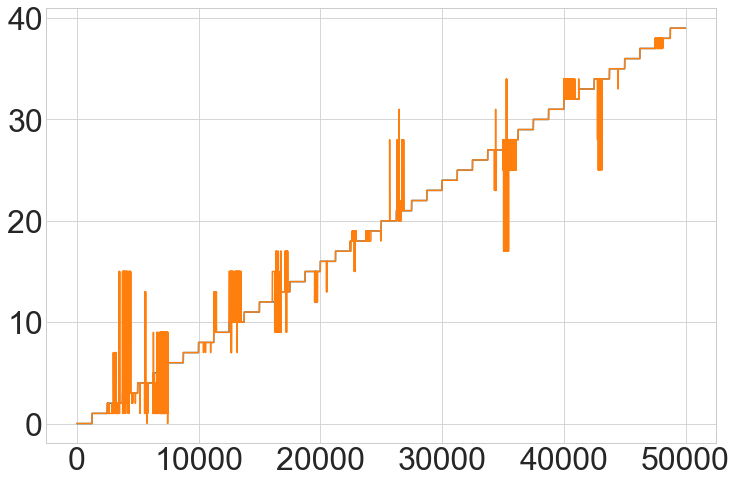

In [31]:
clf_id = 2
predicts = models__[clf_id][0].predict(X_test__)
plt.plot(y_test)
plt.plot(predicts)
print(f"Accuracy of {models[clf_id][1]}:\t {models__[clf_id][0].score(X_test__,y_test)}")

Accuracy of Linear Discriminant Analysis:	 0.94206


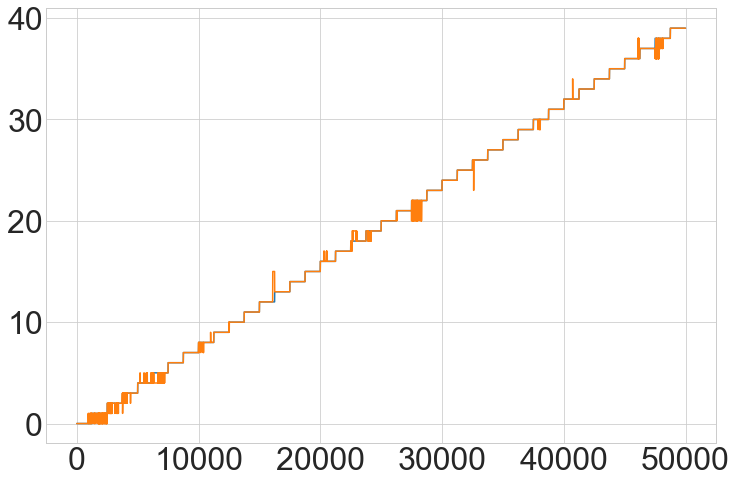

In [32]:
clf_id = 0
predicts = models__[clf_id][0].predict(X_test__)
plt.plot(y_test)
plt.plot(predicts)
print(f"Accuracy of {models[clf_id][1]}:\t {models__[clf_id][0].score(X_test__,y_test)}")

In [33]:
df_minirocket_lda = pd.DataFrame(predicts)
df_minirocket_lda.to_csv('minirocket_lda.csv')

## RF FEATURE IMPORTANCE FEATURE SELECTION

In [21]:
featuresrf = models[2][0].feature_importances_
print(featuresrf.shape)
idx4rest = np.where(featuresrf>0.2*featuresrf.max())#0.023=0.32
# print(df_train.columns[:-1][idx4rest])
X_train__ = X_train[:,idx4rest[0]]
X_test__  = X_test[:,idx4rest[0]]
print(X_train__.shape)

(1933,)
(50000, 19)


In [22]:
models__ = deepcopy(models)

for model,name in models__:
    print(name)
    model.fit(X_train__,y_train)
    print(f"Accuracy for test: {name}:\t {model.score(X_test__,y_test)},Accuracy for train: {model.score(X_train__,y_train)}")

Linear Discriminant Analysis
Accuracy for test: Linear Discriminant Analysis:	 0.88334,Accuracy for train: 0.99868
KNN Classifier
Accuracy for test: KNN Classifier:	 0.88866,Accuracy for train: 1.0
Random Forest Classifier
Accuracy for test: Random Forest Classifier:	 0.92024,Accuracy for train: 0.99956
Naive Bayes Classifier
Accuracy for test: Naive Bayes Classifier:	 0.90254,Accuracy for train: 0.99564


Accuracy of Random Forest Classifier:	 0.92024


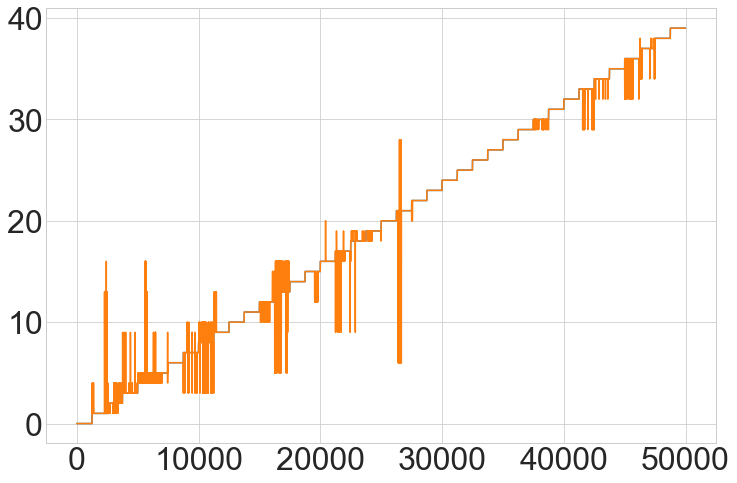

In [23]:
clf_id = 2
predicts = models__[clf_id][0].predict(X_test__)
plt.plot(y_test)
plt.plot(predicts)
print(f"Accuracy of {models[clf_id][1]}:\t {models__[clf_id][0].score(X_test__,y_test)}")

## ANOVA

In [24]:
from sklearn.feature_selection import SelectKBest, RFECV,RFE, VarianceThreshold, SelectFromModel
from sklearn.feature_selection import f_classif,  chi2,  mutual_info_classif 

# Create an SelectKBest object to select features with two best ANOVA F-Values
fselector = SelectKBest(chi2, k=10)
fselector = SelectKBest(f_classif, k=300)
# fselector = SelectKBest(mutual_info_classif, k=18)
# fselector = VarianceThreshold(threshold=.034)
# fselector = RFECV(estimator=models[0][0], step=1, scoring='neg_mean_squared_error')
# fselector = RFE(estimator=models[0][0], step=1)
# fselector = SelectFromModel(estimator=models[0][0],norm_order=1)

# Apply the SelectKBest object to the features and target
fselector.fit(X_train, y_train)


SelectKBest(k=300)

In [25]:
X_train_1 = fselector.transform(X_train)
X_test_1  = fselector.transform(X_test)
X_train_1.shape

(50000, 300)

In [26]:
models_1 = deepcopy(models)

for model,name in models_1:
    print(name)
    model.fit(X_train_1,y_train)
    print(f"Accuracy for test: {name}:\t {model.score(X_test_1,y_test)},Accuracy for train: {model.score(X_train_1,y_train)}")

Linear Discriminant Analysis
Accuracy for test: Linear Discriminant Analysis:	 0.86038,Accuracy for train: 0.99998
KNN Classifier


KeyboardInterrupt: 